<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [7]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    result = image.copy()
    result=np.float32(result)
    result=cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
    h = result.shape[0]
    w=result.shape[1]
    mat=np.zeros((h,w))
    dx=cv2.Sobel(result, cv2.CV_64F, 1, 0, ksize=3)
    dy=cv2.Sobel(result, cv2.CV_64F, 0, 1, ksize=3)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx * dy
    dxx_b=cv2.blur(dx2,(20,20))
    dxy_b=cv2.blur(dxy,(20,20))
    dyy_b=cv2.blur(dy2,(20,20))
    det=dxx_b * dyy_b -np.power(dxy_b,2)
    trace=dxx_b+dyy_b
    result=det-(0.03*np.power(trace,2))            
    #############
    # Your code #
    #############
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

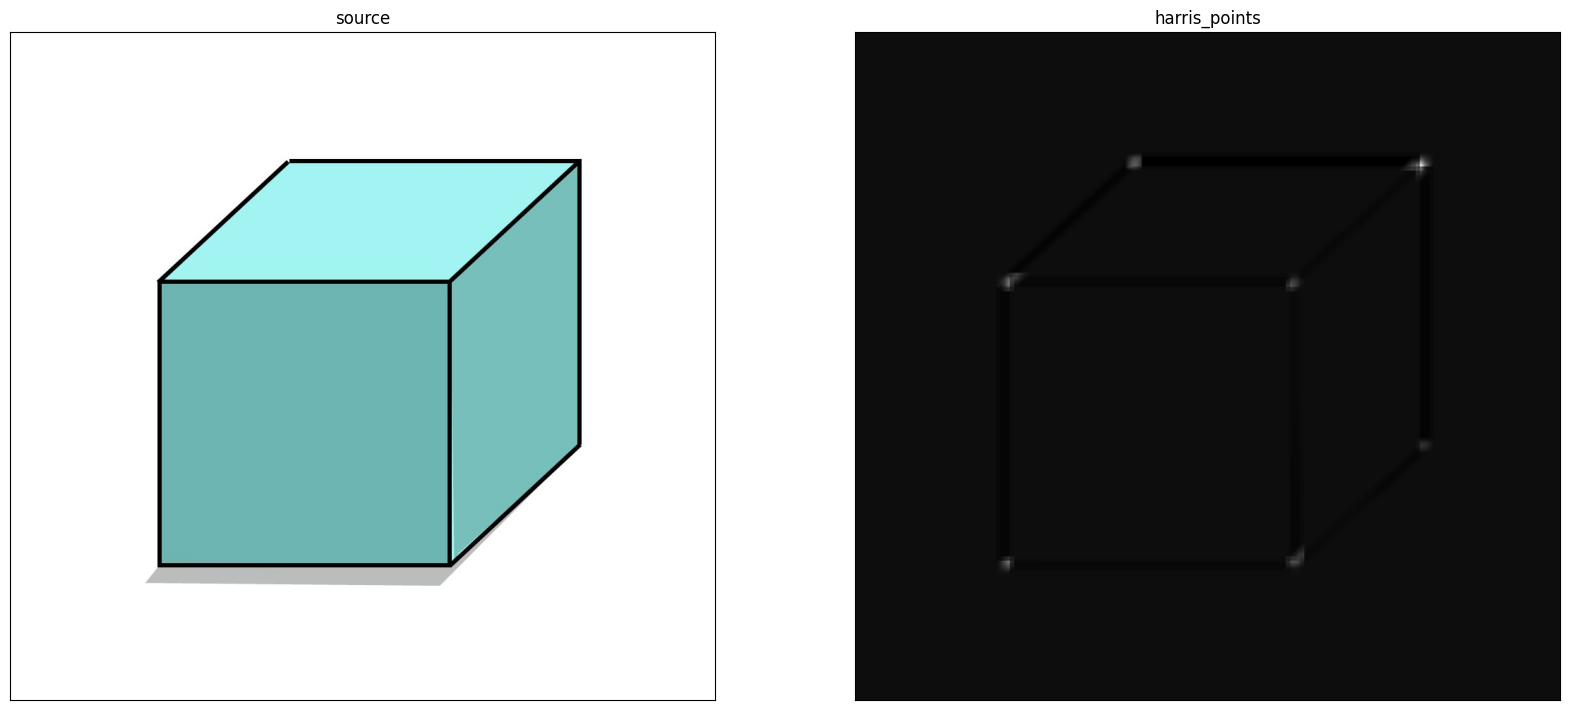

In [8]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [14]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
    #############
    # Your code #
    #############
    g_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    result = np.float32(image)
    dst = cv2.cornerHarris(g_img,3,3,0.06)
    dst = cv2.dilate(dst,None)
    result[dst>0.02*dst.max()]=[0,0,255]
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


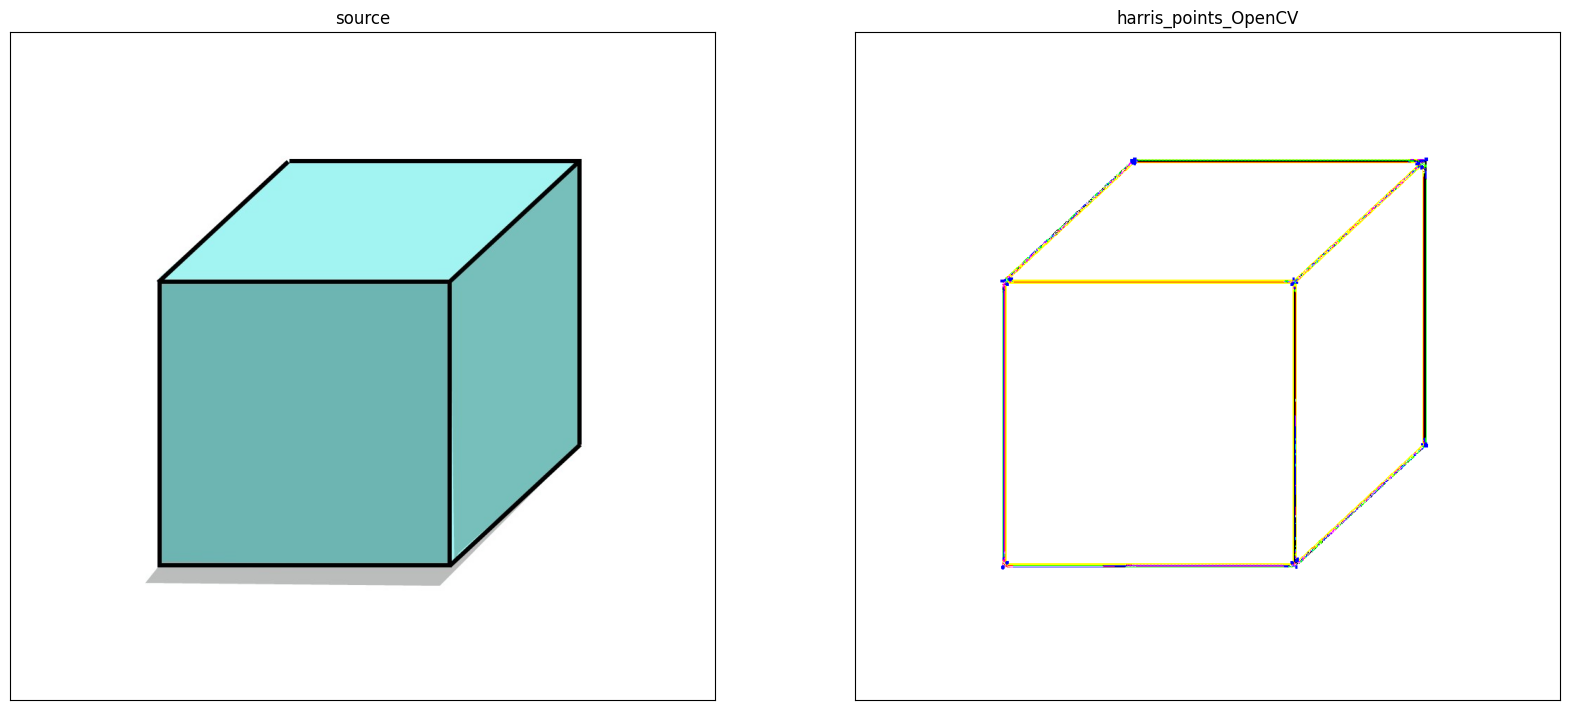

In [15]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')